In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import scipy.stats as ss
from scipy.stats import pareto
import scipy
from pylab import *
import powerlaw
import matplotlib.ticker as ticker
from matplotlib.ticker import PercentFormatter
from matplotlib.ticker import FormatStrFormatter

# Define graph style for the notebook

In [2]:
# alter ALL matplotlib parameters
plt.rcParams.update({'font.size': 12})

In [3]:
# control size of each 
SMALL_SIZE = 12
MEDIUM_SIZE = 16
BIGGER_SIZE = 18

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=BIGGER_SIZE)    # fontsize of the axes title
plt.rc('axes', labelsize=BIGGER_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)

# whitespace controller
plt.rcParams['axes.xmargin'] = 0
plt.rcParams['axes.ymargin'] = 0

# READ IN THE DATASETS 
(from .pkl format - saved dataframes)

In [4]:
ofinal8 = pd.read_pickle('ofinal8.pkl')
ofinal8.info(memory_usage="deep")

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3989346 entries, 0 to 857758
Data columns (total 16 columns):
vid_id              uint32
author              object
upload_date         datetime64[ns]
nb_views            uint32
nb_comments         uint16
nb_likes            uint32
nb_subscriptions    float64
duration            float32
size                float32
tags                object
240p                float32
480p                float32
720p                float32
1080p               float32
channels            object
nb_tags             int64
dtypes: datetime64[ns](1), float32(6), float64(1), int64(1), object(3), uint16(1), uint32(3)
memory usage: 1.2 GB


In [6]:
tag70 = pd.read_pickle('tag70.pkl')

# CDF OF VIEWS

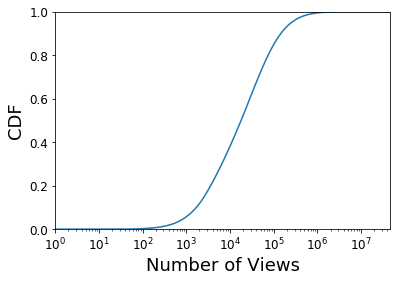

In [9]:
# CDF of views:
#line width
views = ofinal8.nb_views

cdfx = np.sort(views)
cdfy = np.linspace(1 / len(views), 1.0, len(views))

# plot the CDF
plt.xscale('log')
plt.plot(cdfx, cdfy)

plt.xlabel('Number of Views')
# plt.title('CDF of Views')  
plt.ylabel('CDF')

plt.savefig('ViewCDF.eps', bbox_inches="tight")
plt.show()

#plt.savefig('ViewCDF.tif')

# CCDF OF VIEWS

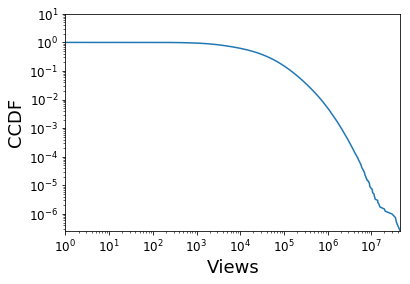

In [20]:
# CCDF of views

cdfx = np.sort(views)
cdfy = np.linspace(1.0,1 / len(views), len(views))
# plot the CDF

fig, ax = plt.subplots()
ax.loglog(cdfx, cdfy)

ax.set(xlabel='Views', ylabel='CCDF')
plt.ylim(top = 10)
#plt.xlim(right = 10000)
#ax.set_ylim(bottom = 10^-4)
# plt.savefig('ViewCCDF.eps')

plt.show()


# CCDF FIT WITH AGAINST A POWERLAW DISTRIBUTION

In [11]:
# CCDF with distribution - remember the other possibilities // regular titles work

views2 = ofinal8.sort_values('nb_views', ascending = False).nb_views
viewsG = views2.loc[views2 >= 1000000]

fit3 = powerlaw.Fit(viewsG, estimate_discrete=False)


Calculating best minimal value for power law fit
/anaconda3/lib/python3.7/site-packages/powerlaw.py:700: RuntimeWarning: divide by zero encountered in true_divide
  (Theoretical_CDF * (1 - Theoretical_CDF))
/anaconda3/lib/python3.7/site-packages/powerlaw.py:700: RuntimeWarning: invalid value encountered in true_divide
  (Theoretical_CDF * (1 - Theoretical_CDF))


alpha=  3.7346910086101124   sigma=  0.04231828097113316


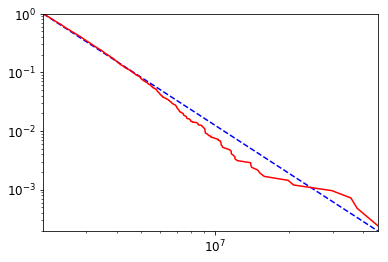

In [12]:
fit3.power_law.plot_ccdf(color= 'b',linestyle='--',label='fit ccdf')
fit3.plot_ccdf( color= 'r')

# plt.title("CCDF of Views")
print('alpha= ',fit3.power_law.alpha,'  sigma= ',fit3.power_law.sigma)

# plt.savefig('FitViewCCDf.eps')

# VIDEO VIEW RANK PLOT FIT ALONGSIDE A DISTRIBUTION

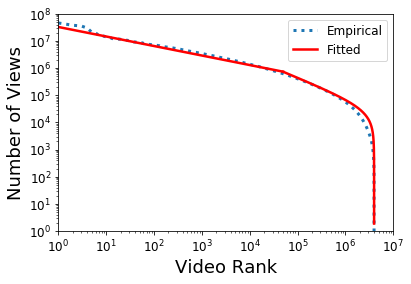

In [5]:
# Video rank plot based on views

views = ofinal8.nb_views

# assign videos to a dataframe ready to be ranked

view_info2 = pd.DataFrame(views)
view_info2.index.name ='view'
view_info2.columns = ["count"]

# assign rank to each video
view_info2['rank'] = view_info2.rank(axis=0,method='first',ascending=False)

# sort ready to graph
view_info2 = view_info2.sort_values('rank')

# Graph it
plt.ylabel("Number of Views")
plt.xlabel("Video Rank")

plt.loglog(view_info2['rank'], view_info2['count'], linestyle = 'dotted', basex=10, linewidth = 3,label="Empirical")

############################################################
############################################################
############################################################

# First part of piecewise fit is a line in log log scale
x1 = np.arange(1, 5e4, step = 20)

y1 = np.exp(17.3-0.35*np.log(x1))
plt.loglog(x1,y1, basex=10, linewidth = 2.5,color = "red",label="Fitted")

# Second part of piecewise fit is a curve
def lavalette(f, b, c):
  N = 3989346
  inside = N*f / (N+1-f)
  return c*(inside**(-b))

x2 = np.arange(5e4, 3989346, step = 20)
y2 = lavalette(x2, 0.73, 2e9)

plt.loglog(x2,y2, basex=10, linewidth = 2.5,color = "red")
plt.ylim(top = 100000000)
plt.xlim(right = 10000000)

plt.legend()

plt.savefig('ViewRankviews1.eps', bbox_inches="tight")


plt.show()



# VIDEO RANK PLOT OF VARIOUS GROUPS

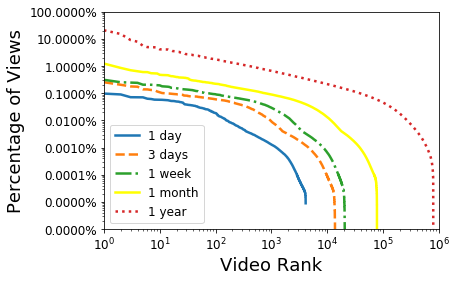

In [18]:
# Video rank plot based on views

# 1 day since end of crawl
day = ofinal8.loc[ofinal8['upload_date'] == '2018-08-23']

# 3 days since end of crawl
day3 = ofinal8.loc[ofinal8['upload_date'] >= '2018-08-20']
#day3

# 1 week since end of crawl
week = ofinal8.loc[ofinal8['upload_date'] >= '2018-08-16']
#week

# 1 month since end of crawl
month = ofinal8.loc[ofinal8['upload_date'] >= '2018-07-23']
#month

# 1 year since end of crawl
year = ofinal8.loc[ofinal8['upload_date'] >= '2017-08-23']
#year

views1 = day.nb_views
views3 = day3.nb_views
viewsweek = week.nb_views
viewsmon = month.nb_views
viewsyear = year.nb_views

# Assign to dataframes
views1 = pd.DataFrame(views1)
views1.index.name ='view'
views1.columns = ["count"]

views3 = pd.DataFrame(views3)
views3.index.name ='view'
views3.columns = ["count"]

viewsweek = pd.DataFrame(viewsweek)
viewsweek.index.name ='view'
viewsweek.columns = ["count"]

viewsmon = pd.DataFrame(viewsmon)
viewsmon.index.name ='view'
viewsmon.columns = ["count"]

viewsyear = pd.DataFrame(viewsyear)
viewsyear.index.name ='view'
viewsyear.columns = ["count"]

# assign rank to each video
views1['rank'] = views1.rank(axis=0,method='first',ascending=False)
views3['rank'] = views3.rank(axis=0,method='first',ascending=False)
viewsweek['rank'] = viewsweek.rank(axis=0,method='first',ascending=False)
viewsmon['rank'] = viewsmon.rank(axis=0,method='first',ascending=False)
viewsyear['rank'] = viewsyear.rank(axis=0,method='first',ascending=False)

# sort ready to graph
views1 = views1.sort_values('rank')
views3 = views3.sort_values('rank')
viewsweek = viewsweek.sort_values('rank')
viewsmon = viewsmon.sort_values('rank')
viewsyear = viewsyear.sort_values('rank')


# Graph it
plt.ylabel("Percentage of Views")
plt.xlabel("Video Rank")

plt.loglog(views1['rank'], views1['count'], basex=10, label = '1 day', linewidth = 2.5)
plt.loglog(views3['rank'], views3['count'], basex=10, label = '3 days', ls = '--', linewidth = 2.5)
plt.loglog(viewsweek['rank'], viewsweek['count'], basex=10, label = '1 week', linewidth = 2.5, ls = '-.')
plt.loglog(viewsmon['rank'], viewsmon['count'], basex=10, label = '1 month', linewidth = 2.5, ls = '-', color = 'yellow')
plt.loglog(viewsyear['rank'], viewsyear['count'], basex=10, label = '1 year', linewidth = 2.5, ls = ':')

plt.ylim(top   = 100000000)
plt.xlim(right = 1000000)
#plt.xticks(rotation=340)

plt.gca().yaxis.set_major_formatter(PercentFormatter(100000000.000, decimals = 4))
#plt.gca().xaxis.set_major_formatter(ticker.FuncFormatter(lambda y,pos: ('{{:.{:1d}f}}'.format(int(np.maximum(-np.log10(y),0)))).format(y)))
plt.legend(loc = 'best')

plt.savefig('TimeBasedViewRank%.eps', bbox_inches="tight")

plt.show()


# UPLOAD INJECTION RATE

[]

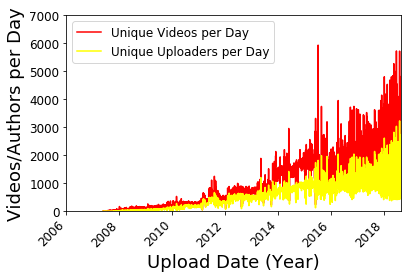

In [29]:
# Injection rate
days = ofinal8['upload_date']
day_info = days.value_counts()

author_date = pd.DataFrame()
author_date['id'] = ofinal8.vid_id
author_date['upload_date'] = ofinal8.upload_date
author_date['author'] = ofinal8.author

day_graph = day_info.plot(label = 'Unique Videos per Day', ls = "-", color = 'r')

uniquea = author_date.groupby('upload_date')['author'].nunique()
uniquea.plot(color = 'yellow', label = 'Unique Uploaders per Day')

day_graph.set_xlabel("Upload Date (Year)")
day_graph.set_ylabel("Videos/Authors per Day")

plt.ylim(top=7000)
plt.xlim(left = datetime.date(2006, 1, 1))
plt.xticks(rotation=45)

plt.legend()
plt.savefig('InjectionRate.eps', bbox_inches="tight")

plt.plot()

# CUMULATIVE SUM OF UPLOADS

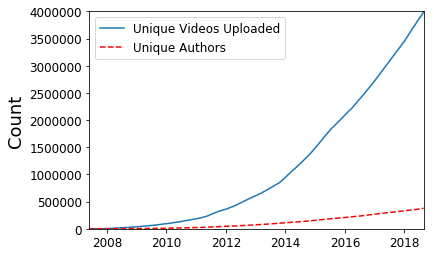

In [15]:
# CUMULATIVE VIDEOS OVER TIME x-axis date, y-axis running total

# CUMULATIVE SUM 
day_info2 = pd.DataFrame(days).groupby(days).count()
day_info2.columns = ['num_vids']
day_info2['cum_sum'] = day_info2.cumsum()
day_info2

# Plot Cumulative Sum 
plt.plot(day_info2.index, day_info2.cum_sum, label = "Unique Videos Uploaded")
plt.xlabel("")
plt.ylabel("Count")

# Cumulative Sum of Authors: Wont include anon though........
author_date = pd.DataFrame()
author_date['date'] = ofinal8['upload_date']
author_date['author'] = ofinal8['author']

author_date2 = author_date.drop_duplicates('author').groupby('date').count()
author_date2['sum'] = author_date2.cumsum()

plt.plot(author_date2.index, author_date2['sum'], color = 'r', label = 'Unique Authors', ls = "--")
plt.legend()

plt.ylim(top = 4000000 )

plt.savefig('cumsumvids.eps', bbox_inches='tight')
plt.show()


# REMOVAL RATE OF VIDEOS 

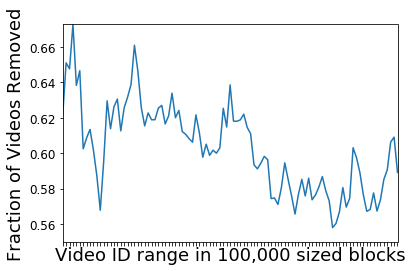

In [12]:
# Removal Rate

# set up the dataframe to graph
remo_df = pd.DataFrame()
remo_df['vid_id'] = ofinal8.vid_id

# sort out number of buckets
buckets = np.linspace(0,10100000,101)
remo_df['binned'] = pd.cut(remo_df.vid_id, buckets)

size_remo = remo_df.groupby(pd.cut(remo_df.vid_id, buckets)).size()

# each bin 101,000 big so get difference and put into column then plot that
sr_df = pd.DataFrame(size_remo)
sr_df['missing'] = 101000 - sr_df[0] 

# make intervals labels 
labels = sr_df.index.tolist()
n_labels = []
for label in labels:
    n_labels.append(str(label))
n_labels

# obtain fraction removed and plot
sr_df['fraction'] = sr_df.missing / 101000
plt.plot(n_labels[:-1], sr_df.fraction[:-1])
plt.tick_params(axis = 'x', which = 'major', bottom = True, top = False, labelbottom = False)
plt.xlabel('Video ID range in 100,000 sized blocks')
plt.ylabel('Fraction of Videos Removed')
plt.savefig('removalrate.eps', bbox_inches='tight')

plt.xlim(right = 98.0)
plt.ylim(bottom = 0.55)

plt.show()


# HISTOGRAM OF TAGS AND CATEGORIES

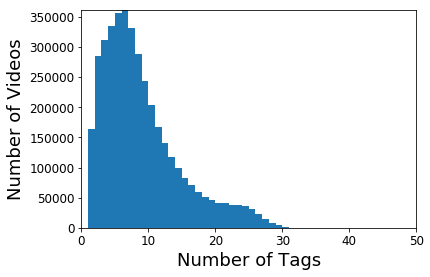

In [38]:
# Histogram of Categories and Tags

nb_tags = ofinal8.nb_tags

plt.hist(nb_tags,bins = 50)
plt.xlabel("Number of Tags")
plt.ylabel("Number of Videos")
plt.savefig('taghist.eps', bbox_inches='tight')
plt.show()


# Average views per video with x tags

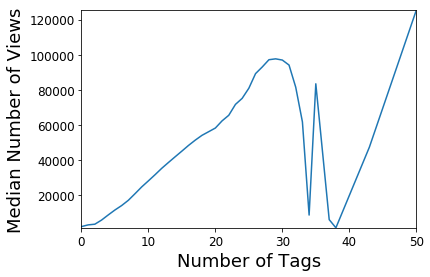

In [7]:
# Average views per video with x categories

tag_views = pd.DataFrame()
tag_views['nb_tags'] = ofinal8['nb_tags']
tag_views['nb_views'] = ofinal8['nb_views']
tag_views = tag_views.sort_values('nb_tags')

# get average for every tag
average_views_tags = tag_views.groupby(['nb_tags']).median()

plt.plot(average_views_tags)
plt.xlabel('Number of Tags')
plt.ylabel('Median Number of Views')
plt.savefig('medianviewsvstags.eps', bbox_inches='tight')
plt.show()


# Number of videos for the most popular tags

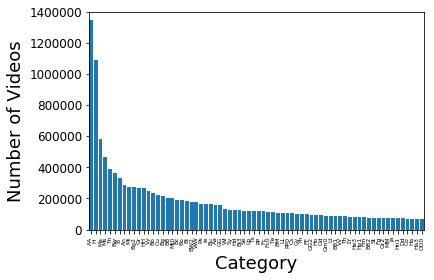

In [7]:
# Number of Videos for the top using tag70

# bar chart of num vids with each tag
tag701 = tag70[:-1]

labels = tag701.index.values
y_positions = range(len(labels))

plt.bar(y_positions, tag701.total)
plt.xticks(y_positions, labels, rotation='vertical', fontsize=6)
plt.ylabel('Number of Videos')
plt.xlabel('Category')

plt.ylim(top = 1400000)
plt.show()


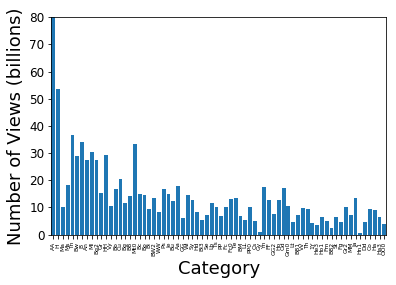

In [27]:
#VERSION 2#

# bar chart of num views with each tag - ordered by tag prevalence sorted by vids in category 
fig = plt.figure()
ax = plt.gca()

y = range(0,10)
ylabels = ["0","10","20","30","40","50","60","70","80"]

tag70_sorttotal = tag701.sort_values('total', ascending = False)

xlabels = tag70_sorttotal.index.values
y_positions = range(len(xlabels))

plt.bar(y_positions, tag70_sorttotal.views)
plt.xticks(y_positions, xlabels, rotation='vertical', fontsize=6)
plt.ylabel('Number of Views (billions)')
plt.xlabel('Category')
ax.set_yticklabels(ylabels)
plt.savefig('viewspertag.eps', bbox_inches='tight')

plt.show()

# Inefficiency of catgories (supply vs demand of videos with a given tag)

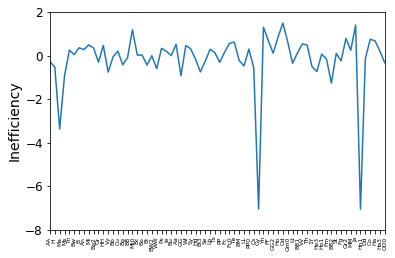

In [40]:
# inefficiency 

# inefficiency graph - sorted by the number of videos in each category
tag70_sorttotal = tag70[:70].sort_values('total', ascending = False)

labels = tag70_sorttotal.index.values
y_positions = range(len(labels))

plt.plot(y_positions, tag70_sorttotal.inefficiency)
plt.xticks(y_positions, labels, rotation='vertical', fontsize=6)
plt.ylabel('Inefficiency')
#plt.title('Inefficiency value for each category')

plt.ylim(-8,2)

# plt.savefig('inefficiency.eps')
plt.show()
